In [83]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
train_df = pd.read_csv("working_data/trial_promo_training_original.csv")
test_df = pd.read_csv("working_data/trial_promo_testing.csv")

In [85]:
features_to_scale = ["age", "income", "avbal", "avtrans"]
columns_to_drop_for_nn = ["sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
min_max_scaler = preprocessing.MinMaxScaler()
train_df[features_to_scale] = min_max_scaler.fit_transform(train_df[features_to_scale])

train_df.head()

,age,income,avbal,avtrans,decision,sexNum,mstatusNum,occupationNum,educationNum,childrenNum,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.481241,0.120073,0.273538,0.324016,None,0,1,6,0,2,...,0,1,0,0,0,0,0,1,0,0
1,0.035354,0.120073,0.273538,0.324016,None,1,2,1,2,0,...,0,0,0,1,0,1,0,0,0,0
2,0.490188,0.026902,0.257021,0.151600,None,0,1,0,2,0,...,0,0,0,1,0,1,0,0,0,0
3,0.111688,0.120073,0.273538,0.324016,A,1,1,1,2,0,...,0,0,0,1,0,1,0,0,0,0
4,0.135354,0.193942,0.260347,0.138515,None,1,2,2,3,0,...,0,0,0,0,1,1,0,0,0,0


In [86]:
X_train = train_df.loc[:, train_df.columns != "decision"]
X_train = X_train.drop(columns_to_drop_for_nn, axis=1)
y_train = train_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.481241,0.120073,0.273538,0.324016,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.035354,0.120073,0.273538,0.324016,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.490188,0.026902,0.257021,0.151600,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.111688,0.120073,0.273538,0.324016,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0.135354,0.193942,0.260347,0.138515,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [87]:
y_train.head()

0    2
1    2
2    2
3    0
4    2
Name: decision, dtype: int64

In [88]:
test_df[features_to_scale] = min_max_scaler.transform(test_df[features_to_scale])
test_df.head()

X_test = test_df.loc[:, test_df.columns != "decision"]
X_test = X_test.drop(columns_to_drop_for_nn, axis=1)
y_test = test_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.704906,0.080506,0.063522,0.100964,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.139105,0.088530,0.232708,0.122881,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.514719,0.300505,0.338760,0.089771,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.148052,0.346235,0.180242,0.390105,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.425830,0.556900,0.231039,0.484708,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### Neural network

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Training accuracy

In [90]:
clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 8, 4), random_state= 42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

[[ 43   0  57]
 [  0  17  12]
 [ 28   5 588]]
0.864


### Testing accuracy

In [91]:
y_test_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2]))
print(accuracy_score(y_test, y_test_pred))

[[  9   0  24]
 [  0   3   7]
 [ 17   7 183]]
0.78


In [92]:
from sklearn.ensemble import RandomForestClassifier
columns_for_rf = ["age", "income", "avbal", "avtrans", "sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
X_train = train_df[columns_for_rf]
y_train = train_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)

X_train.head()

,age,income,avbal,avtrans,sexNum,mstatusNum,occupationNum,educationNum,childrenNum
0,0.481241,0.120073,0.273538,0.324016,0,1,6,0,2
1,0.035354,0.120073,0.273538,0.324016,1,2,1,2,0
2,0.490188,0.026902,0.257021,0.151600,0,1,0,2,0
3,0.111688,0.120073,0.273538,0.324016,1,1,1,2,0
4,0.135354,0.193942,0.260347,0.138515,1,2,2,3,0


In [93]:
clf = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print(y_train_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [94]:
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

[[  0   0 100]
 [  0   0  29]
 [  0   0 621]]
0.828


In [95]:
X_test = test_df[columns_for_rf]
y_test = test_df["decision"].replace("A", 0).replace("B", 1).replace("None", 2)

y_test_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

[[  0   0  33]
 [  0   0  10]
 [  0   0 207]]
0.828


### Build a neural network using Keras

In [96]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# fix random seed for reproducibility
np.random.seed(42)

In [97]:
# create model
num_features = X_train.shape[1]
model = Sequential()
model.add(Dense(10, input_dim=num_features, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(3, activation='sigmoid'))

In [98]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=3)

In [100]:
history = model.fit(X_train, y_train_one_hot, epochs=75, batch_size=100, verbose=0, validation_split=0.5)

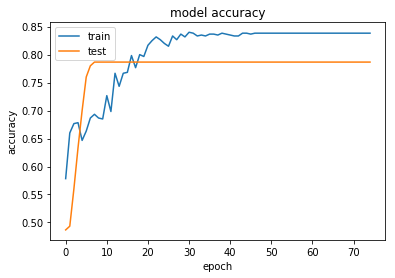

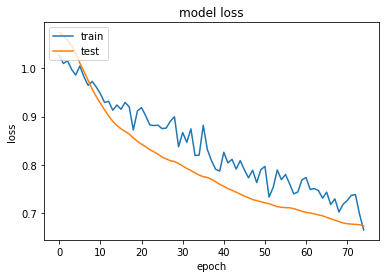

In [101]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Training confusion matrix and accuracy

In [105]:
keras_nn_predictions_train = model.predict(X_train)
keras_nn_predictions_train = np.argmax(keras_nn_predictions_train, axis=1)
print(confusion_matrix(y_train, keras_nn_predictions_train, labels=[0, 1, 2]))
print(accuracy_score(y_train, keras_nn_predictions_train))

[[  0   0 100]
 [  0   0  29]
 [  0   0 621]]
0.828


In [102]:
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=3)

# evaluate the model
scores = model.evaluate(X_test, y_test_one_hot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

250/250 [==============================] - 0s 97us/step

acc: 82.80%


In [103]:
keras_nn_predictions = model.predict(X_test)
len(keras_nn_predictions)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
len(keras_nn_predictions)
keras_nn_predictions
print(confusion_matrix(y_test, keras_nn_predictions, labels=[0, 1, 2]))
print(accuracy_score(y_test, keras_nn_predictions))

[[  0   0  33]
 [  0   0  10]
 [  0   0 207]]
0.828
